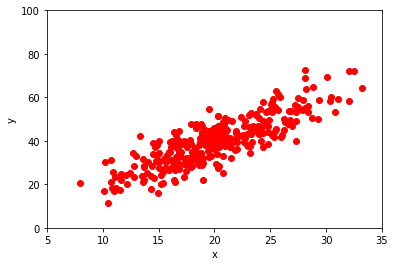

In [3]:
import numpy as np
num_points = 300
vectors_set = []
for i in xrange(num_points):
  x = np.random.normal(5,5)+15
  y =  x*2+ (np.random.normal(0,3))*2
  vectors_set.append([x,y])
  
x_data = [v[0] for v in vectors_set ]
y_data = [v[1] for v in vectors_set ]

import matplotlib.pyplot as plt
plt.plot(x_data,y_data,'ro')
plt.ylim([0,100])
plt.xlim([5,35])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
import numpy as np
import tensorflow as tf

input_fn_train = tf.estimator.inputs.numpy_input_fn(
    x = {"x":np.array(x_data[:200],dtype=np.float32)},
    y = np.array(y_data[:200],dtype=np.float32),
    num_epochs=100000,
    batch_size=50,
    shuffle=True
)

input_fn_eval = tf.estimator.inputs.numpy_input_fn(
    x = {"x":np.array(x_data[200:300],dtype=np.float32)},
    y = np.array(y_data[200:300],dtype=np.float32),
    num_epochs=100000,
    batch_size=50,
    shuffle=True
)

input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    x = {"x":np.array([15,20,25,30],dtype=np.float32)},
    num_epochs=1,
    shuffle=False
)
column_x = tf.feature_column.numeric_column("x",dtype=tf.float32)
columns = [column_x]

estimator = tf.contrib.learn.LinearRegressor(feature_columns=columns,optimizer="Adam")
estimator.fit(input_fn = input_fn_train,steps=5000)

estimator.evaluate(input_fn = input_fn_eval,steps=10)
result = list(estimator.predict(input_fn = input_fn_predict))

print (result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x126c07f10>, '_model_dir': '/var/folders/nl/k74j52jd4bg8_h8gyhg15q_400bvyx/T/tmpmE3e4t', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to

[29.18034, 38.535892, 47.891445, 57.247002]
